In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Exercises
### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

- Using lemonade.csv dataset and focusing on continuous variables:
    - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
     - Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
     - Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
     - Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

- Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

     - Use a 2 sigma decision rule to isolate the outliers.
         - Do these make sense?
         - Should certain outliers be kept or removed?

- Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [3]:
df = pd.read_csv('lemonade.csv')

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
df.shape

(365, 7)

In [6]:
df.tail()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


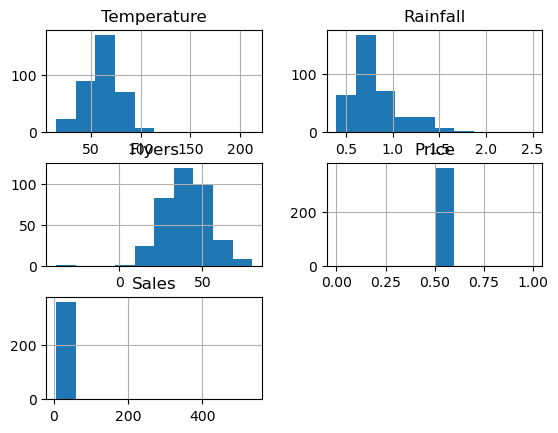

In [7]:
df.hist();

In [83]:
df.describe()

,temperature,rainfall,flyers,price,sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [85]:
df.date = df.date.astype('datetime64')
df = df.set_index('date')
df = df.sort_index()

In [86]:
df.head()

,day,temperature,rainfall,flyers,price,sales
date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [9]:
def get_lower_and_upper_bounds(s, multiplier=1.5):
    """
    This function will
    - accept a numeric series, s; and a float, multipler with the default value of 1.5
    - calculate the lower and upper limit, for example:
        - upper = Q3 + 1.5*IQR
        - lower = Q1 - 1.5*IQR
        - Q1 and Q3 are the quartile values for the 1st/3rd quartiles
        - IQR is the Interquartile range which is Q3-Q1
    - this method works for non-normally distributed data (according to curriculum / Tukey)
    - returns lower_bound and upper_bound
    """
    Q1 = s.quantile(.25)
    Q3 = s.quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    
    return lower, upper


In [87]:
# make column names lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

<AxesSubplot:>

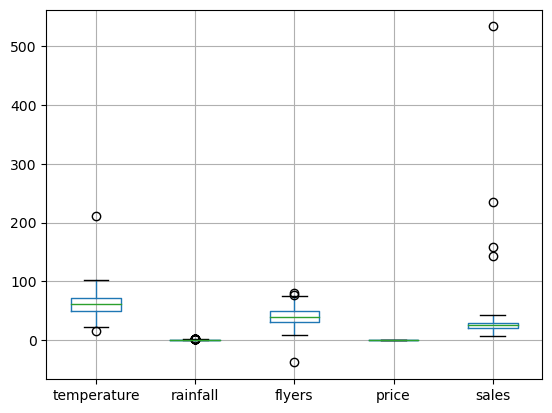

In [90]:
df.boxplot()

<AxesSubplot:>

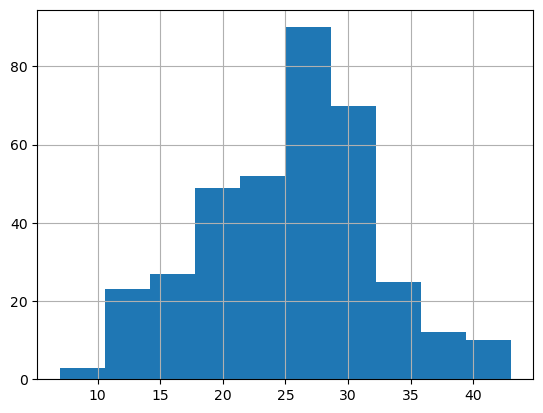

In [94]:
df[df.sales<100].sales.hist()

In [91]:
# define numeric column names to iterate over
num_cols = ['temperature', 'rainfall', 'flyers', 'price', 'sales']

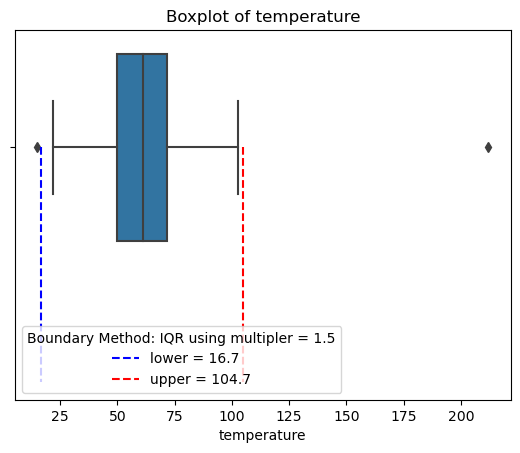

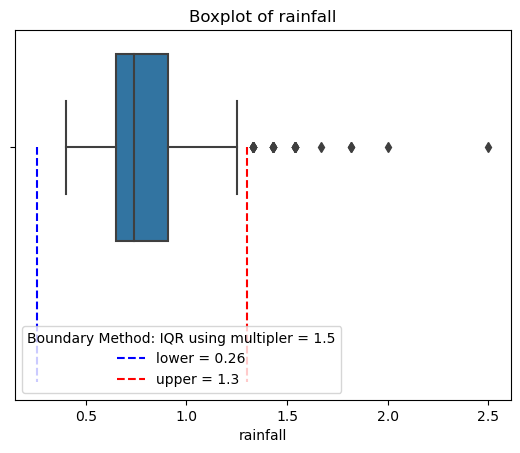

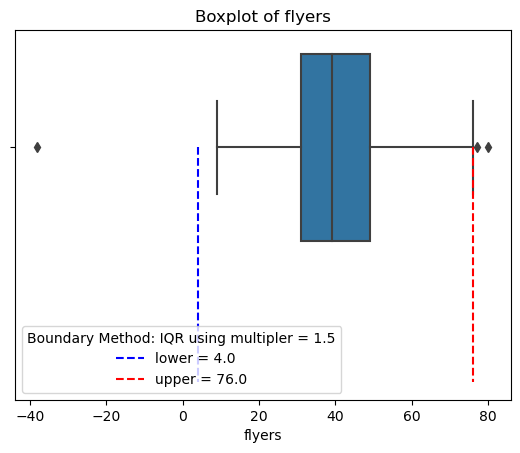

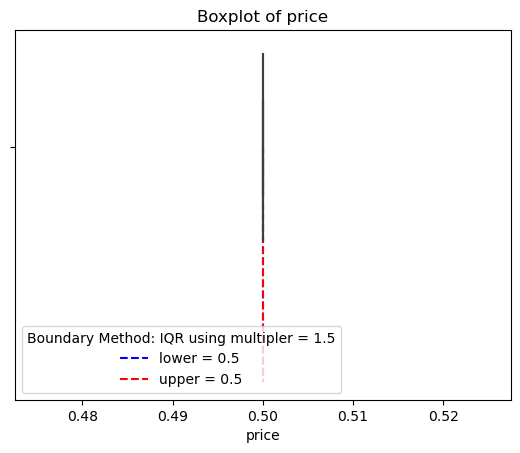

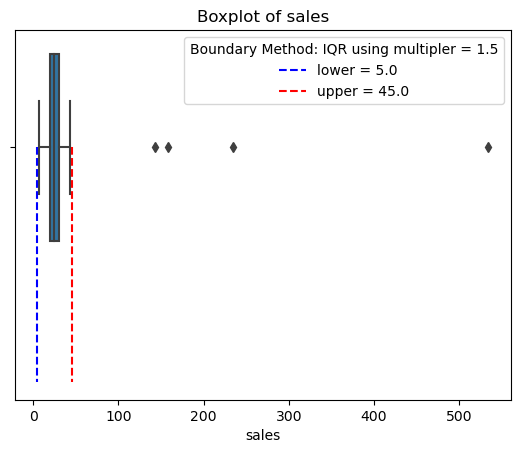

In [95]:
# print a boxplot and the lower and upper bound for each numeric column
multiplier = 1.5
for col in num_cols:
    lower, upper = get_lower_and_upper_bounds(df[col], multiplier)
    sns.boxplot(data = df, x=col, whis=1.5)
    plt.vlines(lower, 0, 1, colors='blue', linestyles='dashed', label=f'lower = {round(lower,2)}')
    plt.vlines(upper, 0, 1, colors='red', linestyles='dashed', label=f'upper = {round(upper,2)}')
    plt.title(f'Boxplot of {col}')
    plt.legend(title=f'Boundary Method: IQR using multipler = {multiplier}')
    plt.show()
    # print(f'{col} lower bound = {lower}')
    # print(f'{col} upper bound = {upper}')
    print()

## Summary of plotting
- Do outliers make sense if using upper and lower bound of 1.5 IQR above Q3 / below Q1?
    - get rid of the ridiculously high temperature
    - keep all the rainfalls
    - get rid of the negativer number for flyers
    - price is steady, no outliers
    - check with the folks running the lemonade stand to make sure the high sales value is correct. If so keep.

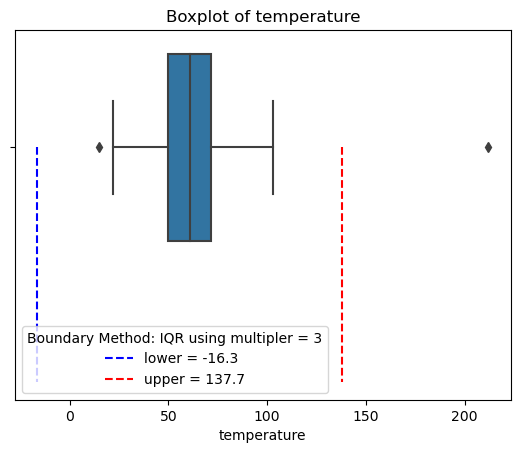

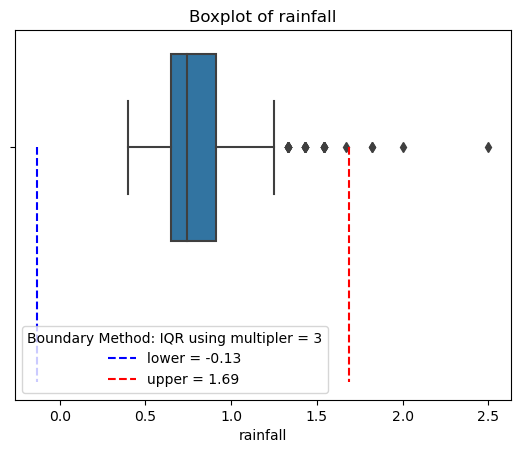

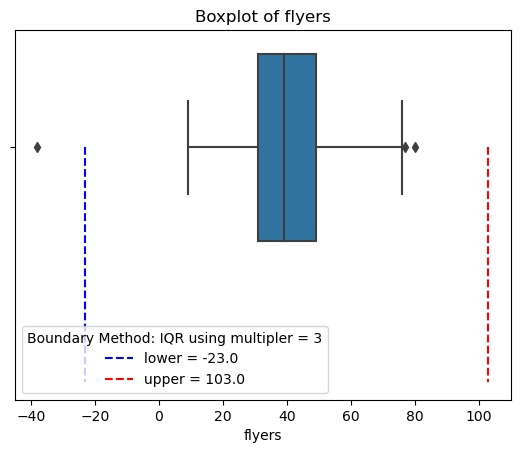

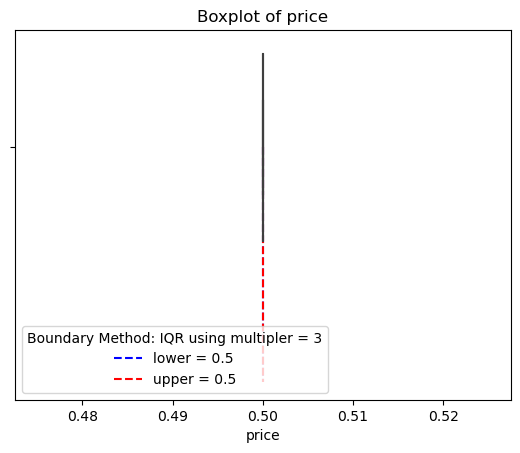

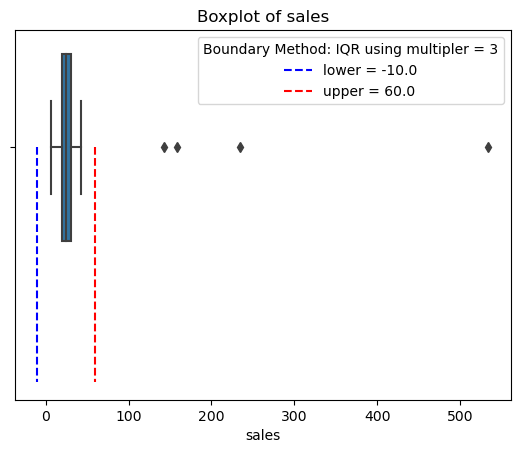

In [45]:
# print a boxplot and the lower and upper bound for each numeric column
multiplier = 3
for col in num_cols:
    lower, upper = get_lower_and_upper_bounds(df[col], multiplier)
    sns.boxplot(data = df, x=col)
    plt.vlines(lower, 0, 1, colors='blue', linestyles='dashed', label=f'lower = {round(lower,2)}')
    plt.vlines(upper, 0, 1, colors='red', linestyles='dashed', label=f'upper = {round(upper,2)}')
    plt.title(f'Boxplot of {col}')
    plt.legend(title=f'Boundary Method: IQR using multipler = {multiplier}')
    plt.show()
    # print(f'{col} lower bound = {lower}')
    # print(f'{col} upper bound = {upper}')
    print()

- Do outliers make sense if using upper and lower bound of 3 IQR above Q3 / below Q1?
    - SAME ANSWER as above:
    - get rid of the ridiculously high temperature
    - keep all the rainfalls
    - get rid of the negativer number for flyers
    - price is steady, no outliers
    - check with the folks running the lemonade stand to make sure the high sales value is correct. If so keep.

# 2. normally distributed columns?

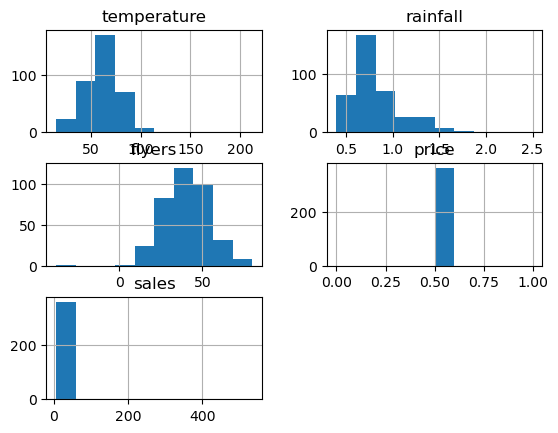

In [46]:
df.hist();

In [47]:
# temperature, rainfall, and flyers are normally distributed

In [36]:
def get_x_sigma_lower_upper(s, sigma_multiplier=3):
    """
    This function will
    - accept a normally-distributed numeric series s, and a float sigma_multiplier with default value 3
    - calculate lower and upper using +- sigma_multiplier * standard deviation
    - return lower, upper
    """
    sigma = s.std()
    mean_ = s.mean()
    lower = mean_ - sigma * sigma_multiplier
    upper = mean_ + sigma * sigma_multiplier
    return lower, upper

In [51]:
get_x_sigma_lower_upper(df.rainfall)

(0.00430180168016403, 1.6476434037992895)

In [54]:
num_cols = ['temperature', 'rainfall', 'flyers']

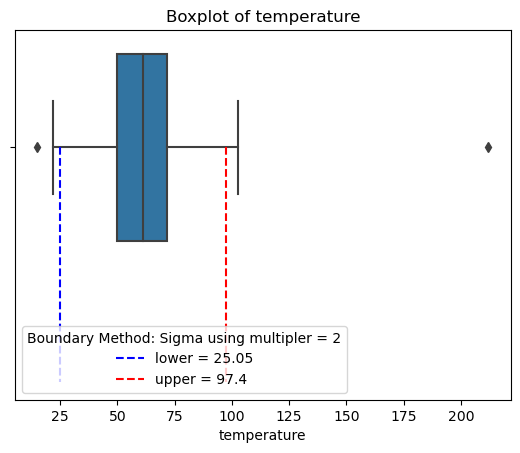

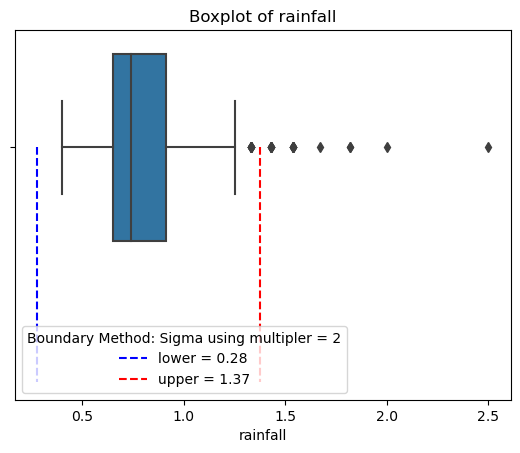

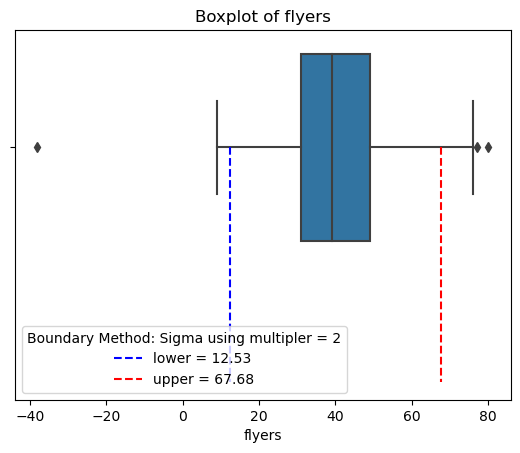

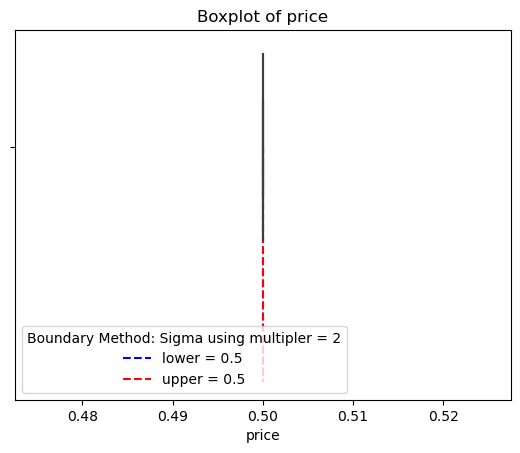

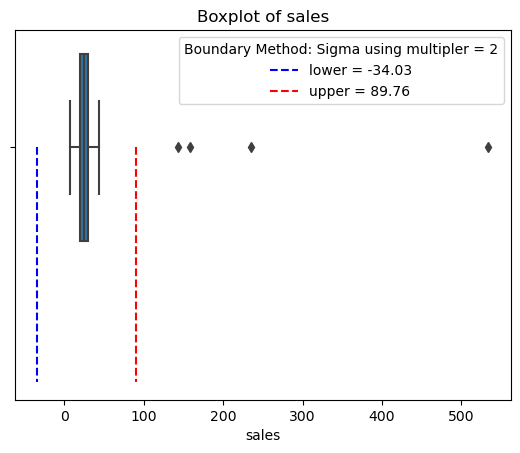

In [39]:
# print a boxplot and the lower and upper bound for each numeric column
multiplier = 2
for col in num_cols:
    lower, upper = get_x_sigma_lower_upper(df[col], multiplier)
    sns.boxplot(data = df, x=col)
    plt.vlines(lower, 0, 1, colors='blue', linestyles='dashed', label=f'lower = {round(lower,2)}')
    plt.vlines(upper, 0, 1, colors='red', linestyles='dashed', label=f'upper = {round(upper,2)}')
    plt.title(f'Boxplot of {col}')
    plt.legend(title=f'Boundary Method: Sigma using multipler = {multiplier}')
    plt.show()
    # print(f'{col} lower bound = {lower}')
    # print(f'{col} upper bound = {upper}')
    print()

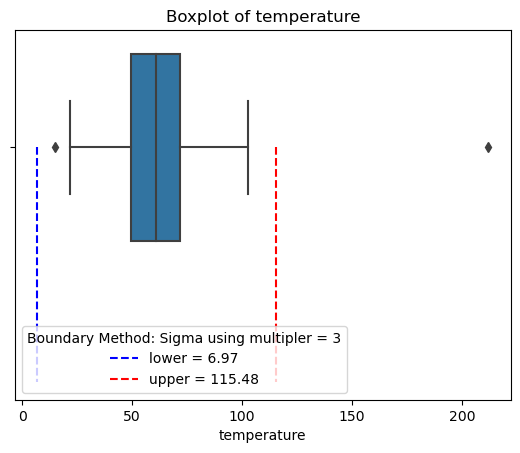

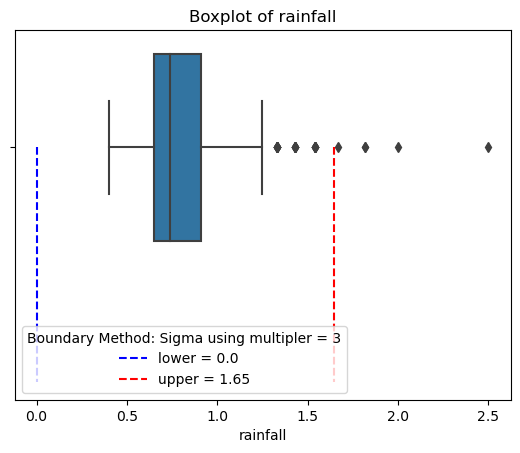

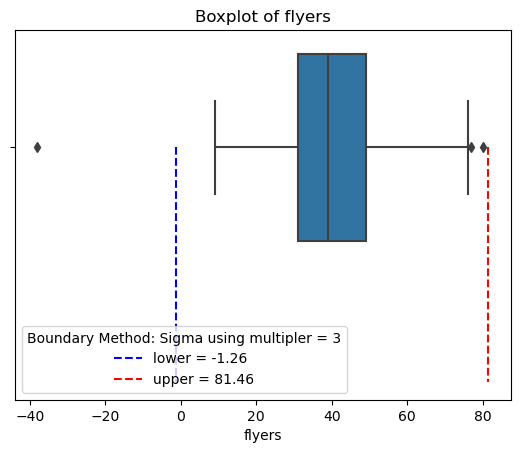

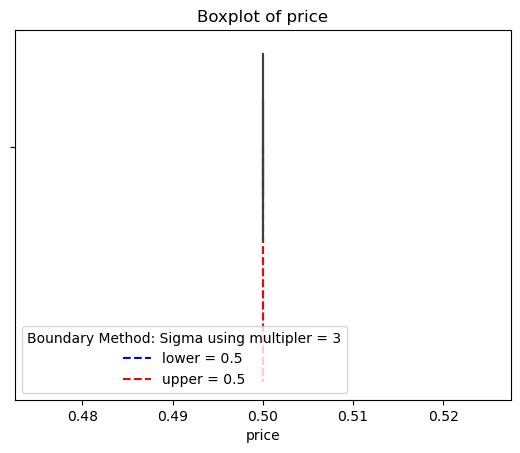

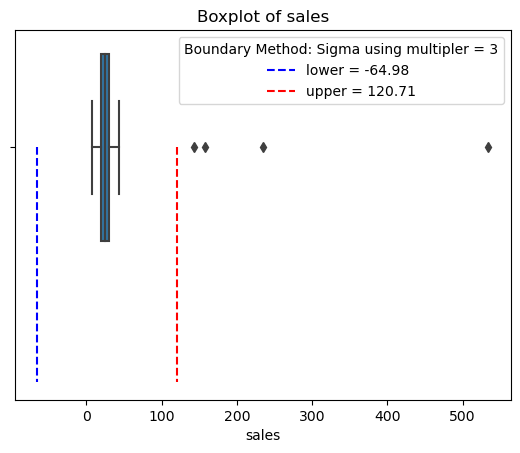

In [38]:
# print a boxplot and the lower and upper bound for each numeric column
multiplier = 3
for col in num_cols:
    lower, upper = get_x_sigma_lower_upper(df[col], multiplier)
    sns.boxplot(data = df, x=col)
    plt.vlines(lower, 0, 1, colors='blue', linestyles='dashed', label=f'lower = {round(lower,2)}')
    plt.vlines(upper, 0, 1, colors='red', linestyles='dashed', label=f'upper = {round(upper,2)}')
    plt.title(f'Boxplot of {col}')
    plt.legend(title=f'Boundary Method: Sigma using multipler = {multiplier}')
    plt.show()
    # print(f'{col} lower bound = {lower}')
    # print(f'{col} upper bound = {upper}')
    print()

# Bottom line,
- I would make no changes to what I said in the beginning:
    - get rid of the ridiculously high temperature
    - keep all the rainfalls
    - get rid of the negativer number for flyers
    - price is steady, no outliers
    - check with the folks running the lemonade stand to make sure the high sales value is correct. If so keep.

### Playing with plt.boxplot vs sns.boxplot

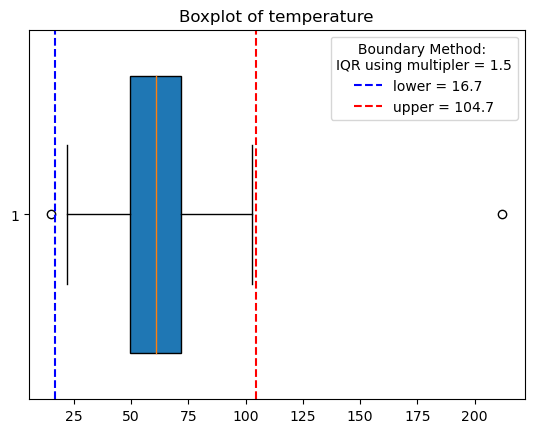

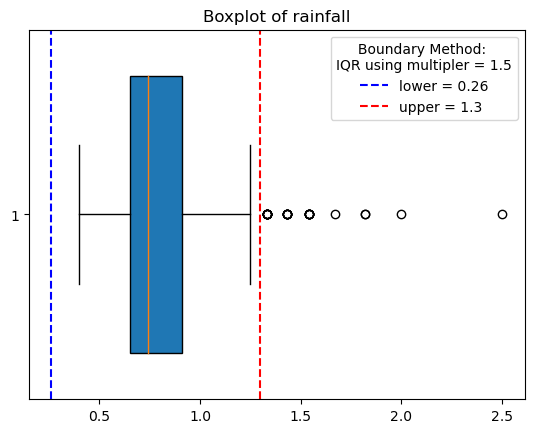

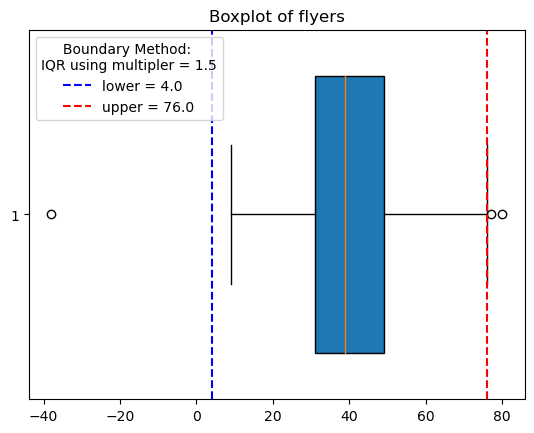

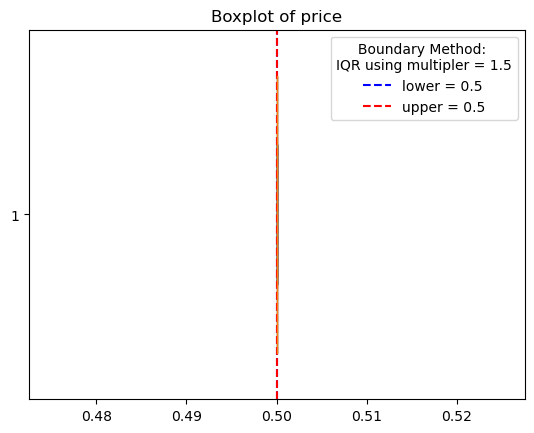

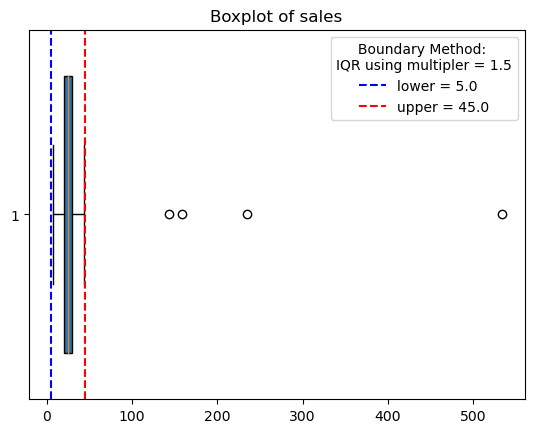

In [67]:
# I want to see if I can make this work with plt instead of sns
# print a boxplot and the lower and upper bound for each numeric column
multiplier = 1.5
for col in num_cols:
    lower, upper = get_lower_and_upper_bounds(df[col], multiplier)
    plt.boxplot(df[col], vert=False, widths=.75, patch_artist=True)
    plt.vlines(lower, 0.5, 1.5, colors='blue', linestyles='dashed', label=f'lower = {round(lower,2)}')
    plt.vlines(upper, 0.5, 1.5, colors='red', linestyles='dashed', label=f'upper = {round(upper,2)}')
    plt.title(f'Boxplot of {col}')
    plt.legend(title=f'     Boundary Method: \nIQR using multipler = {multiplier}')
    plt.show()
    # print(f'{col} lower bound = {lower}')
    # print(f'{col} upper bound = {upper}')
    print()